# Compatibility with scanpy and Seurat

The function `get_cell_counts` allows you to convert the Polaris output to a gene counts per cell table. This format is compatible with many downstream analysis tools, such as scanpy and squidpy. The data in this form can also be exported for downstream analysis in R packages, like Seurat.

To run this notebook you will need to pip install these requirements, which is not included in the requirements file for this package.

In [1]:
# pip install scanpy
# pip install leidenalg

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from anndata import AnnData
import scanpy as sc

from tensorflow.keras.utils import get_file

from deepcell.datasets import SpotNetExampleData
from deepcell_spots.utils.results_utils import get_cell_counts

/usr/local/lib/python3.8/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [3]:
data = SpotNetExampleData()

In [4]:
df_spots = data.load_data(file='MERFISH_output')

# Convert detected spots to gene counts per cell

In [5]:
cell_counts = get_cell_counts(df_spots)
cell_counts

100%|████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.72s/it]


,batch_id,cell_id,Cckar,Net1,Sdc1,Maoa,Cd4,Neat1,Glp2r,Cd79b,...,Ptger2,Taar8c,Taar3,Rcor2,Htr5a,Taar8b,Drd3,Scn3a,Gper1,Gpr18
0,26,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,26,2,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,26,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26,5,3,2,10,3,0,34,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,26,192,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
192,26,193,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
193,26,194,1,0,1,0,9,4,2,0,...,0,0,0,0,0,0,0,0,0,0
194,26,195,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Remove cells with zero counts
zero_cells = []
for i in range(len(cell_counts)):
    if sum(cell_counts.iloc[i].values[2:])==0:
        zero_cells.append(i)
mask = cell_counts.index.isin(zero_cells)
cell_counts = cell_counts.loc[~mask]
cell_counts

,batch_id,cell_id,Cckar,Net1,Sdc1,Maoa,Cd4,Neat1,Glp2r,Cd79b,...,Ptger2,Taar8c,Taar3,Rcor2,Htr5a,Taar8b,Drd3,Scn3a,Gper1,Gpr18
1,26,2,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26,5,3,2,10,3,0,34,0,1,...,0,0,0,0,0,0,0,0,0,0
5,26,6,0,3,8,5,0,23,0,1,...,0,0,0,0,0,0,0,0,0,0
6,26,7,2,0,7,2,1,11,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,26,191,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
192,26,193,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
193,26,194,1,0,1,0,9,4,2,0,...,0,0,0,0,0,0,0,0,0,0
194,26,195,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
features = cell_counts.to_numpy()[:,2:]
features.shape

(190, 196)

# Analysis with scanpy

In [8]:
adata = AnnData(features)

In [9]:
# Example clustering analysis for cell type assignment
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)
adata

/usr/local/lib/python3.8/dist-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.8/dist-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.8/dist-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argument 

AnnData object with n_obs × n_vars = 190 × 196
    obs: 'leiden'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

/tmp/ipykernel_6655/1742190522.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = mpl.cm.get_cmap('Accent')


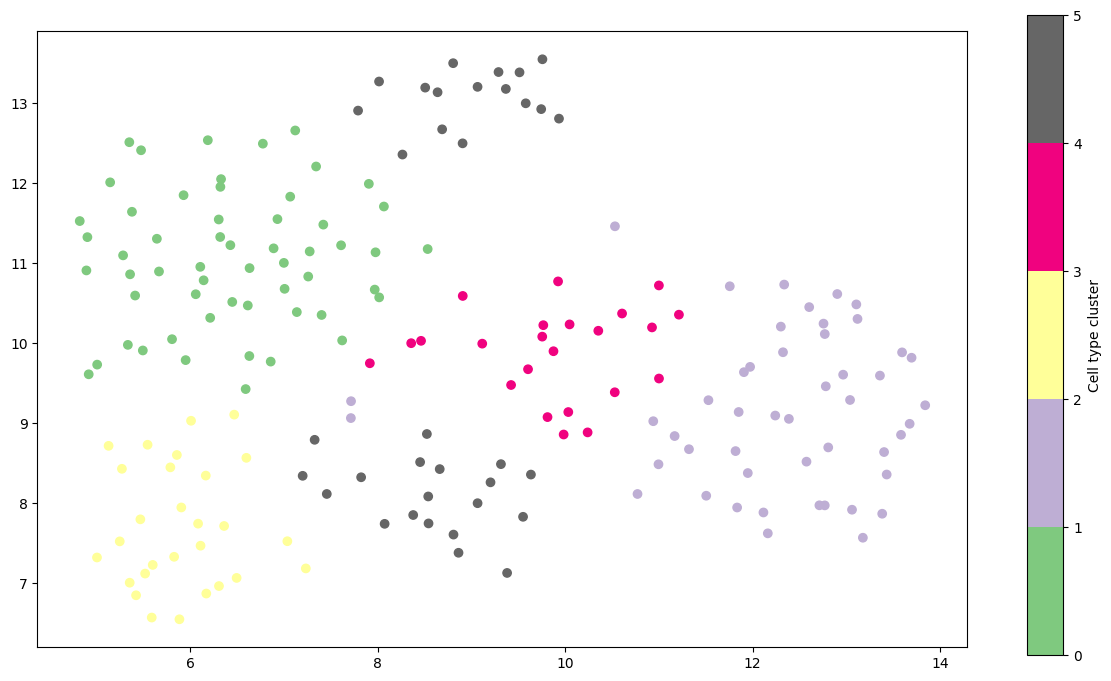

In [10]:
cell_assignments = np.array(adata.obs['leiden'].astype(int))
n_cell_types = max(cell_assignments)

cm = mpl.cm.get_cmap('Accent')
bounds = np.linspace(0, n_cell_types, n_cell_types+1)
norm = mpl.colors.BoundaryNorm(bounds, cm.N)

fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(adata.obsm['X_umap'][:,0], adata.obsm['X_umap'][:,1],
           c=np.array(cell_assignments),
           cmap=cm, alpha=1, norm=norm)

ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
cb = mpl.colorbar.ColorbarBase(ax2, cmap=cm, norm=norm, label='Cell type cluster',
    spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')
plt.show()